#### Encode inputs into the amplitude of a vector using rotation encoding.

In [1]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

import math 
import numpy as np
from random import randrange

In [2]:
def beta_j_s(j, s, alpha):
    num = math.sqrt(sum([alpha[(((2*j)-1)*(2**(s-1)))+l]**1 for l in range(1,2**(s-1)+1)]))
    den = math.sqrt(sum([alpha[((j-1)*(2**s))+l]**1 for l in range(1,2**s+1)]))
    return (2*math.asin(num/den) if num else 0)

alpha = [0]+[randrange(1,1000) for _ in range(16) ]
alpha = np.round(alpha/np.linalg.norm(alpha,1.0), 20)

num_qubits = int(np.ceil(np.log2(len(alpha)-1)))
total_len = 2**num_qubits
alpha = np.append(alpha, [0]*(total_len-len(alpha)+1))
[np.sqrt(i) for i in alpha[1:]]

[0.10852851252348514,
 0.27793807862864467,
 0.2307991578696609,
 0.07912402419893048,
 0.29694968790639936,
 0.30050184397819496,
 0.3156568057483953,
 0.16988960762091695,
 0.21997067253202995,
 0.2854716408418839,
 0.24528663804772127,
 0.2101014388361457,
 0.26940795304016235,
 0.3144780352186374,
 0.2992633854215878,
 0.22189185025329008]

#### Calculate the rotation angles.

In [3]:
print (alpha, num_qubits)

h = {}

s = 1
for i in range(num_qubits):
    total = 2**(num_qubits-s)
    jlist = range(1, total+1)

    for j in jlist:
        h[(s,j)] = beta_j_s(j,s,alpha)
        print ((s,j), h[(s,j)])

    s += 1

QC = QuantumCircuit(num_qubits)
state = Statevector(QC)
state.draw(output="Latex")

[0.         0.01177844 0.07724958 0.05326825 0.00626061 0.08817912
 0.09030136 0.09963922 0.02886248 0.0483871  0.08149406 0.06016553
 0.04414261 0.07258065 0.09889643 0.08955857 0.04923599] 4
(1, 1) 2.3970520533129034
(1, 2) 0.6605395341150059
(1, 3) 1.5826872134288987
(1, 4) 0.9874924915268188
(1, 5) 1.8285426402586566
(1, 6) 1.4165743126096049
(1, 7) 1.7248705413149577
(1, 8) 1.2760262225663512
(2, 1) 1.3708962192254706
(2, 2) 1.4072616079273241
(2, 3) 1.4613801310697028
(2, 4) 1.4652653994595242
(3, 1) 1.9259937252218424
(3, 2) 1.7109939911577978
(4, 1) 1.6598358330618797


<IPython.core.display.Latex object>

Beta  (4, 1) 0 Binary string :   1.6598358330618797
Beta  (3, 1) 1 Binary string :  0 1.9259937252218424
Beta  (3, 2) 1 Binary string :  1 1.7109939911577978
Beta  (2, 1) 2 Binary string :  00 1.3708962192254706
Beta  (2, 2) 2 Binary string :  01 1.4072616079273241
Beta  (2, 3) 2 Binary string :  10 1.4613801310697028
Beta  (2, 4) 2 Binary string :  11 1.4652653994595242
Beta  (1, 1) 3 Binary string :  000 2.3970520533129034
Beta  (1, 2) 3 Binary string :  001 0.6605395341150059
Beta  (1, 3) 3 Binary string :  010 1.5826872134288987
Beta  (1, 4) 3 Binary string :  011 0.9874924915268188
Beta  (1, 5) 3 Binary string :  100 1.8285426402586566
Beta  (1, 6) 3 Binary string :  101 1.4165743126096049
Beta  (1, 7) 3 Binary string :  110 1.7248705413149577
Beta  (1, 8) 3 Binary string :  111 1.2760262225663512


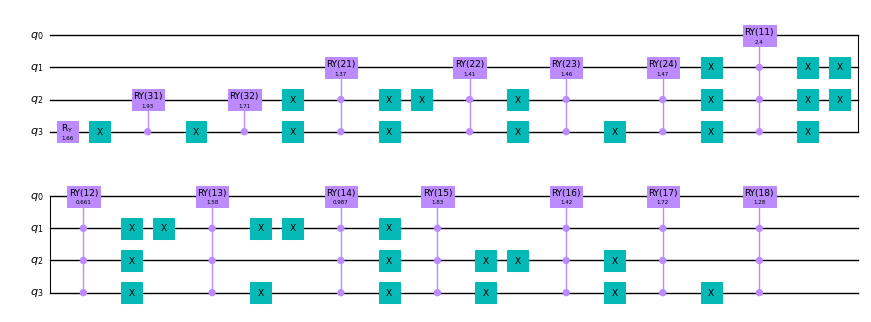

In [4]:
for wire in range(num_qubits, 0, -1):
    for j in range(1, 2**(num_qubits-wire)+1):
        bitstring = format(j-1, "#010b")[-(num_qubits-wire):] if wire != num_qubits else ""
        print ("Beta ", (wire,j),num_qubits-wire, "Binary string : ", bitstring, h[(wire,j)])
        control_wires = []
        
        if not h[(wire,j)]: 
            continue

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)
            control_wires.append(b)
                
        G = RYGate(h[(wire,j)], label="RY(" + str(wire) + str(j) + ")").control(len(control_wires)) if len(control_wires) else RYGate(h[(wire,j)])
        QC.append(G, control_wires + [wire-1])

        for i,b in zip(bitstring, range(wire, num_qubits)):
            if i == '0': 
                QC.x(b)

QC.draw(output='mpl', scale=0.5)

In [5]:
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>